In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl;

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error

%matplotlib inline

import os, sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
# Import library from my src folder    
from src.helpers import feature_importance_plot
from src.learning_curve_plot import learning_curve_plot


In [12]:
songs_data = pd.read_pickle("../data/songs_data_final.pkl")

In [13]:
target = songs_data["genre"]
features = songs_data.drop(["genre"], axis = 1)

In [14]:
X_train, X_test, y_train_rf, y_test_rf = train_test_split(features, target, test_size = 0.2, random_state = 8888)

In [15]:
rf = RandomForestClassifier()

In [16]:
rf.fit(X_train, y_train_rf)

RandomForestClassifier()

In [17]:
y_pred_rf = rf.predict(X_test)
y_pred_rf


array([4, 5, 4, ..., 4, 2, 2])

In [18]:
print("first five predicted values:", y_pred_rf[0:5])
print("first five actual values:", list(y_test_rf[0:5]))

first five predicted values: [4 5 4 2 3]
first five actual values: [3, 5, 1, 3, 3]


In [20]:
print("accuracy:", round(accuracy_score(y_test_rf, y_pred_rf), 2))
print("recall:", round(recall_score(y_test_rf, y_pred_rf, average = 'weighted'), 2))
print("precision:", round(precision_score(y_test_rf, y_pred_rf, average = 'weighted'), 2))
print("f1-score:", round(f1_score(y_test_rf, y_pred_rf, average = 'weighted'), 2))

accuracy: 0.57
recall: 0.57
precision: 0.57
f1-score: 0.57


C:\Users\anaga\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


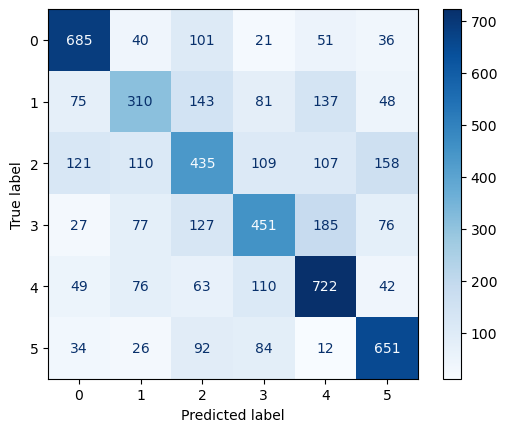

In [25]:
plot_confusion_matrix(rf, X_test, y_test_rf, cmap = plt.cm.Blues);

In [26]:
print(classification_report(y_test_rf, y_pred_rf))

              precision    recall  f1-score   support

           0       0.69      0.73      0.71       934
           1       0.49      0.39      0.43       794
           2       0.45      0.42      0.43      1040
           3       0.53      0.48      0.50       943
           4       0.59      0.68      0.63      1062
           5       0.64      0.72      0.68       899

    accuracy                           0.57      5672
   macro avg       0.57      0.57      0.57      5672
weighted avg       0.57      0.57      0.57      5672



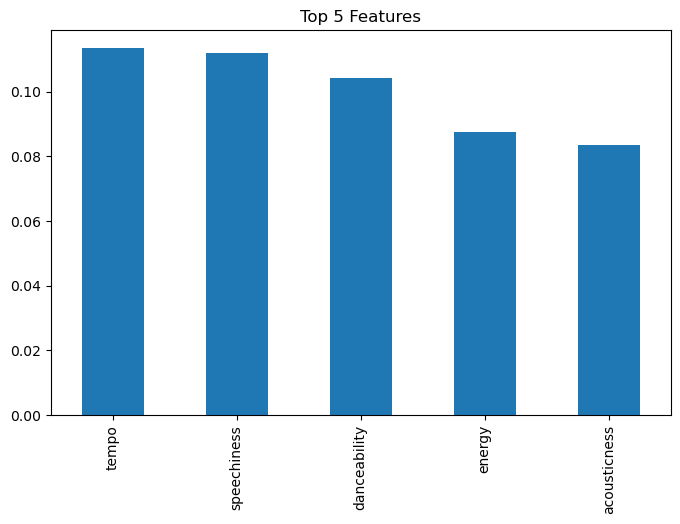

In [22]:
feature_importance_plot(rf, X_train,5)

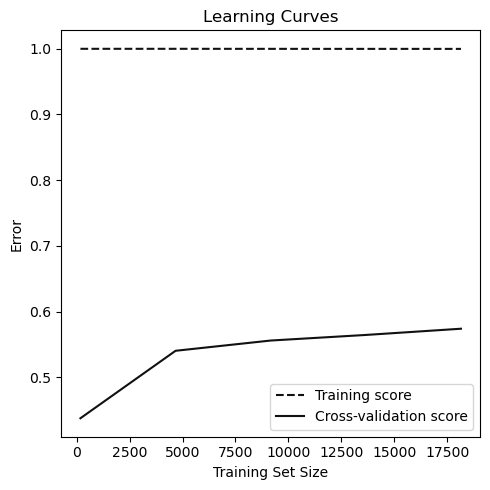

In [28]:
learning_curve_plot(rf, X_train, y_train_rf, scoring = 'accuracy')